## matplotlib Notes

### Importing datasets and packages



In [8]:
# Import the pandas
import pandas as pd

# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Load datasets
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

In [9]:

# Defining levels of categorical variable MONTHS
cats = pd.date_range('2011-01-1', periods = 12, freq = 'M').strftime('%b')

## Seattle data

# Dropping variables and computing mean precipitations by MONTH
seattle_weather = seattle_weather[['DATE', 'MLY-PRCP-NORMAL', 'MLY-TAVG-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL']].set_index('DATE').sort_index()
seattle_weather = seattle_weather.groupby(['DATE']).mean().round(2)

# Create MONTHS
seattle_weather['MONTH'] = seattle_weather.index
seattle_weather['MONTH'] = pd.to_datetime(seattle_weather['MONTH'], format = '%m').dt.month_name().str.slice(stop=3)
seattle_weather['MONTH'] = pd.Categorical(seattle_weather['MONTH'], categories = cats, ordered = True)




## Austin data

# Dropping variables and computing mean precipitations by MONTH
austin_weather = austin_weather[['DATE', 'MLY-PRCP-NORMAL', 'MLY-TAVG-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL']].set_index('DATE').sort_index()
austin_weather = austin_weather.groupby(['DATE']).mean().round(2)

# Create MONTHS
austin_weather['MONTH'] = austin_weather.index
austin_weather['MONTH'] = pd.to_datetime(austin_weather['MONTH'], format = '%m').dt.month_name().str.slice(stop=3)
austin_weather['MONTH'] = pd.Categorical(austin_weather['MONTH'], categories = cats, ordered = True)





### Setting up a plot

`plt.subplots()` is a function returning a tuple containing a figure and axes object; so `fig, ax = plt.subplots()` unpacks the tuple into distinct variables
`fig` and `ax` respectively.

With `fig, ax = plt.subplots()` we draw the figure and the axes, but the plot is only shown after calling `plt.show()`

`plt.rcParams` is a dictionary-style variable containing the default runtime configuration parameters. We can alter them with the syntax: `plt.rcParams.update({'parameter': value})`.
Here we are changing the font size to 8.

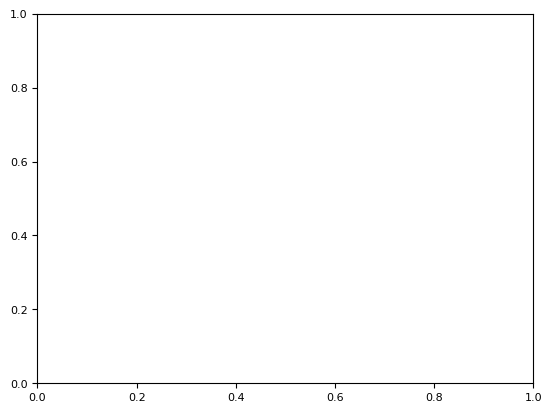

In [10]:
# Adjusting font size
plt.rcParams.update({'font.size': 8})

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

The Axes object is a subportion of the Figure (i.e. an area of the whole "sheet of paper" that is Figure).

If we only a single object in the Figure, we could avoid explicitly assigning the Axes odject. Then we would be able to use `plt.plot()` instead of attributing the
plot to a specific Axes object.  

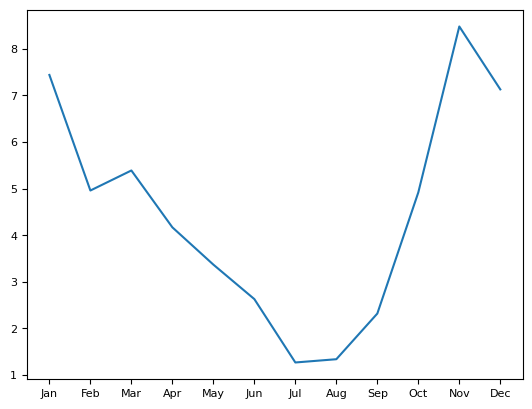

In [11]:
plt.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])
plt.show()

Using `fig, ax = plt.subplots()` we instead explicitly create a Axes object `fig`, and then we will draw in it using `ax.plot()`

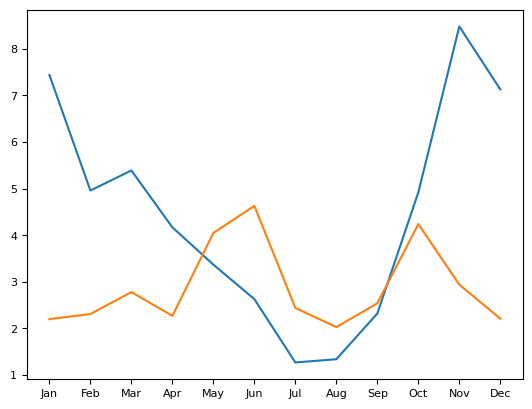

In [12]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

We can change the color(s), marker(s) and linestyle(s) used in the plots by passing additional arguments to the `.plot()` method.

* `color` changes the color of the element (in this case the line and markers of the line plot)
* `marker` changes the style of the markers
* `linestyle` changes the style (i.e. to use dashes, etc.)

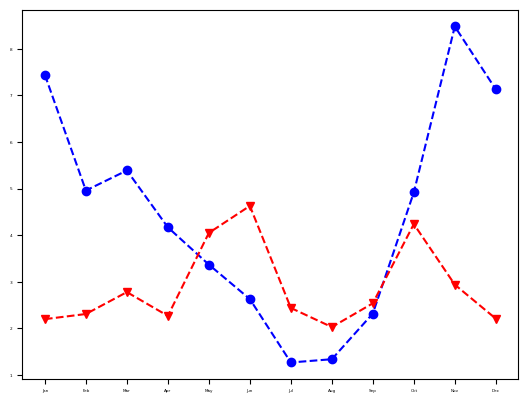

In [21]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'blue', marker = 'o', linestyle = '--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'red', marker = 'v', linestyle = '--')

# Call show to display the resulting plot
plt.show()

We can use `.set_xlabel`, `.set_ylabel`, `.set_title` to relabel the x axis, y axis and figure title respectively.

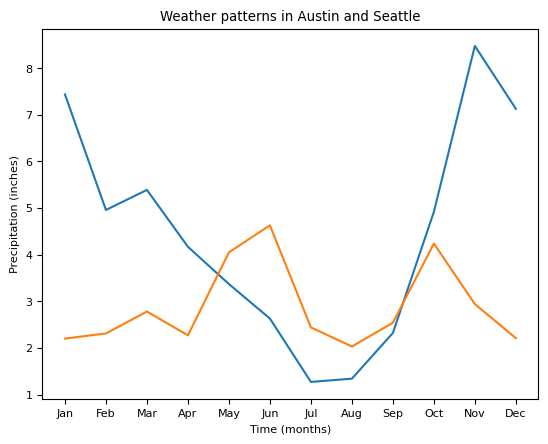

In [14]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')


# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Display the figure
plt.show()

### Multiple subplots in a figure

With `fig, ax = plt.subplots(rows, columns)` we can construct a figure (`Fig`) incorporating multiple axes (subplots).

Then we can specify in which subplot to place each plot by passing its location in the `.plot()` call

`ax[0, 0].plot()` will indicate the plot is to be positioned in the first row and first column (top left corner in a 2 x 2 array of subplots).

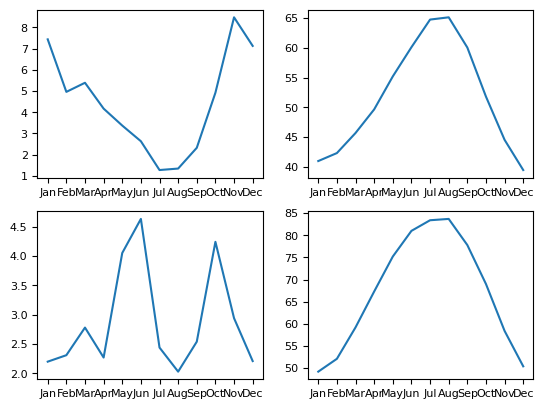

In [15]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)
plt.rcParams.update({'font.size': 3})

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

If we want to build subplots that share the same scale in one of the axis, we can use the argument `sharex = True` or `sharey = True`.

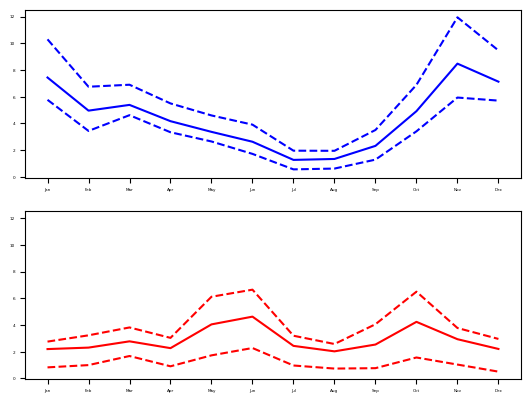

In [24]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-NORMAL"], color = 'blue')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-25PCTL"], color = 'blue', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-75PCTL"], color = 'blue', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-NORMAL"], color = 'red')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'red', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'red', linestyle = '--')

plt.show()